In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools
import cmocean as cm

#### Import data

In [2]:
phys_gridU = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_U.nc')
phys_gridV = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_V.nc')
phys_gridT = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_T.nc')
# test_run_gridU = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/test-salish-bash-submit/sss150_1h_20230225_20230225_grid_U.nc')


#Import mesh
mesh = xr.open_dataset('/ocean/mdunphy/SSS150/grid/mesh_mask_southsalishsea150_update202108210102AUM1.nc')
tmask = 1 - mesh.tmask[0]
umask = 1 - mesh.umask[0]

(300.0, 500.0)

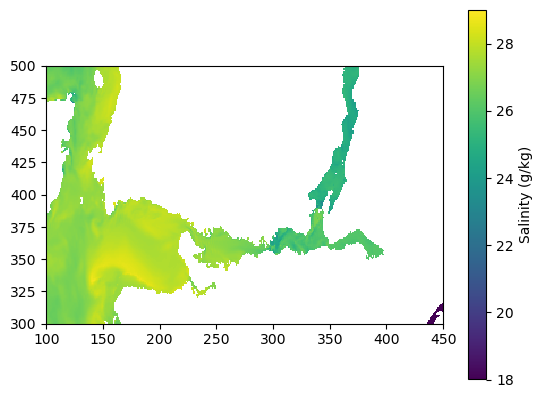

In [3]:
masked_sal = np.ma.masked_array(phys_gridT.vosaline[23, 3], mask=tmask[0])

fig, ax = plt.subplots(1, 1)

pm = ax.pcolormesh(masked_sal,vmin=18,vmax=29)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('Salinity (g/kg)')
ax.set_xlim(100,450)
ax.set_ylim(300,500)

### Progression

Text(0.5, 0.98, 'Salinity')

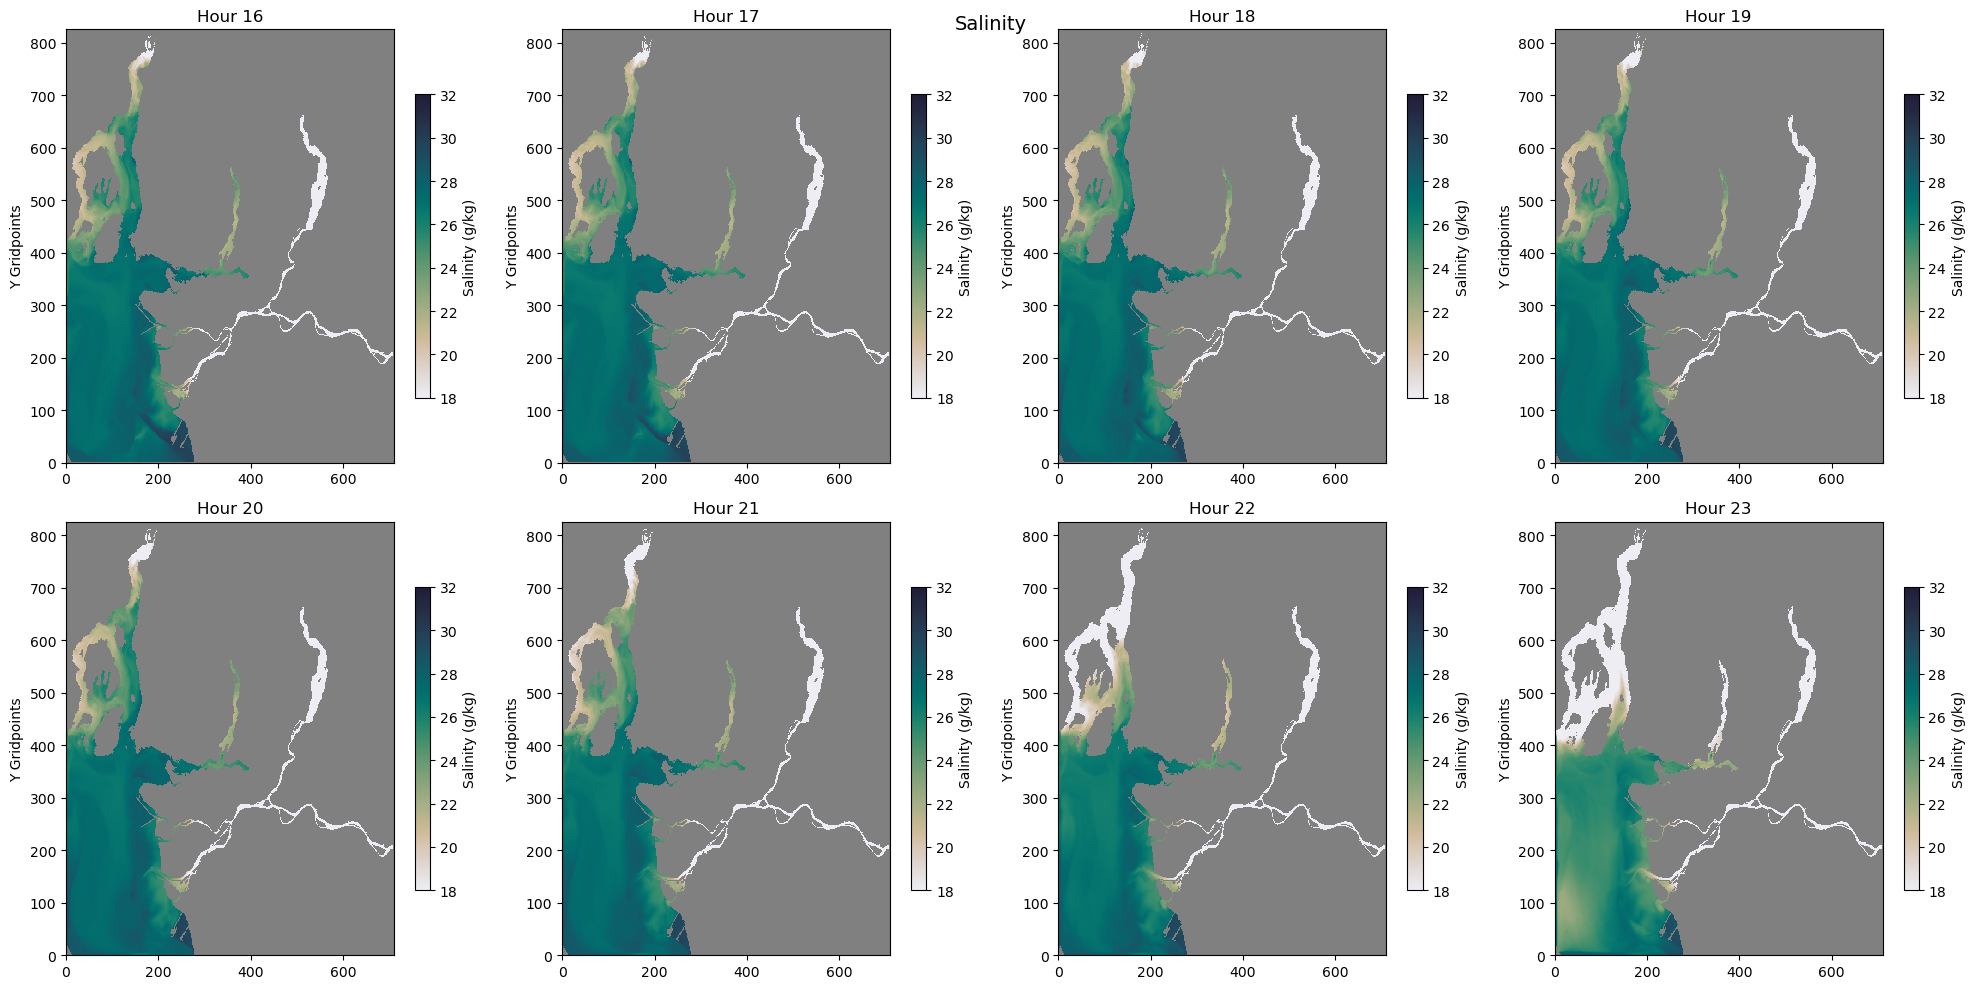

In [4]:
#Plot daily tide cycle surface - Feb23

nrows = 2
ncols = 4

fig, ax = plt.subplots(nrows,ncols,figsize=(20, 10))
cmap = cm.cm.rain
cmap.set_bad('gray')

date = pd.DatetimeIndex(phys_gridU.time_counter.values)

for i in range(nrows):
    for j in range(ncols):
    
        vfull = np.ma.masked_array(phys_gridT.vosaline[i*ncols+j+16, 0], mask=umask[0])
        ax[i,j].pcolormesh(vfull,vmin=18,vmax=32)
        colours = ax[i,j].pcolormesh(vfull, cmap=cmap,vmin=18,vmax=32)
        cb = fig.colorbar(colours, ax=ax[i,j],shrink=0.7)
        cb.set_label('Salinity (g/kg)')
        viz_tools.set_aspect(ax[i,j]);
        ax[i,j].set_ylabel('Y Gridpoints')
        ax[i,j].set_title(f'Hour {date[i*ncols+j+16].hour}')

fig.tight_layout()
fig.suptitle('Salinity',fontsize=14)
